In [1]:
from JUNIPR import *
from load_data import *
from matplotlib import pyplot as plt
from plotting_utilities import *
import numpy as np

In [2]:
data_path = './input_data/JUNIPR_format_jets.dat'
n_events    = 20000
batch_size  = 100
granularity = 10
skip_first  = 0

model_path = './saved_models/JUNIPR_test_weights'

In [3]:
junipr = JUNIPR()

Using SimpleRNN Network


In [4]:
all_data = load_data(data_path, n_events = n_events, batch_size = batch_size, granularity = granularity, skip_first = skip_first)

Getting pickled data from ./input_data/pickled/JUNIPR_format_jets_N20000_D4_BS100_G10_DM100.pickled


In [5]:
[seed_momenta, daughters, mother_momenta, endings, ending_weights, mothers, mother_weights, sparse_branchings, sparse_branchings_weights] = all_data

In [6]:
junipr.load_model(model_path)

In [7]:
Pythia_outputs = junipr.validate(data_path, n_events, predict = False)

Getting pickled data from ./output_data/pickled/DataSet_N20000_D4_BS100_G10_DM100_validate.pickled


In [8]:
JUNIPR_outputs, JUNIPR_probabilities = junipr.validate(data_path, n_events, model_path=model_path, predict = True)

Getting pickled data from ./output_data/pickled/JUNIPR_test_weights_N20000_D4_BS100_G10_DM100_validate.pickled


# End

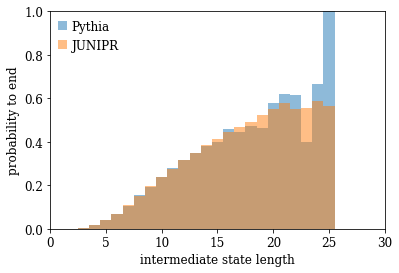

In [9]:
e_settings = {'alpha':0.5, 'width':1}
plt.bar(*p_end(Pythia_outputs[0], Pythia_outputs[1]), label = "Pythia", **e_settings)
plt.bar(*p_end(JUNIPR_outputs[0], JUNIPR_outputs[1]), label = "JUNIPR", **e_settings)
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.axis([0, 30, 0, 1])
plt.xlabel('intermediate state length')
plt.ylabel('probability to end')
plt.legend()
plt.show()

# Mother

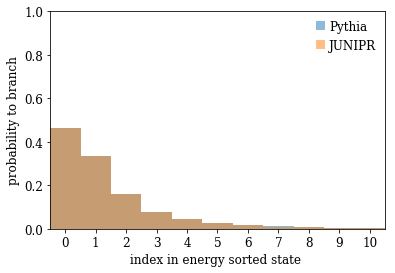

In [10]:
m_settings = {'alpha':0.5, 'width':1}
t = None
plt.bar(*p_mother(Pythia_outputs[2], Pythia_outputs[3], t=t), label="Pythia", **m_settings)
plt.bar(*p_mother(JUNIPR_outputs[2], JUNIPR_outputs[3], t=t), label="JUNIPR", **m_settings)
plt.xticks(np.arange(0, 11, 1))
plt.axis([-0.5, 10.5, 0, 1])
plt.xlabel('index in energy sorted state ' + t_label(t))
plt.ylabel('probability to branch')
plt.legend()
plt.show()

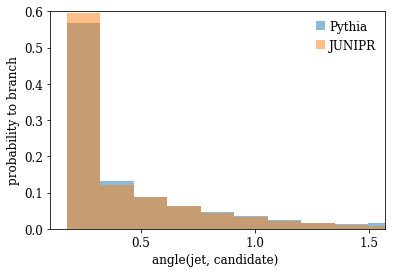

In [11]:
m_settings = {'alpha':0.5, 'width':(r_jet-r_sub)/10}
t = None
plt.bar(*p_mother_vs_angle(Pythia_outputs[6], t = t), label="Pythia", **m_settings)
plt.bar(*p_mother_vs_angle(JUNIPR_outputs[6], t = t), label="JUNIPR", **m_settings)
plt.xticks([0,0.5,1,1.5])
plt.axis([r_sub, r_jet, 0, 0.6])
plt.xlabel('angle(jet, candidate) ' + t_label(t))
plt.ylabel('probability to branch')
plt.legend()
plt.show()

# Branch

In [12]:
b_settings = {'alpha':0.5, 'align':'edge'}

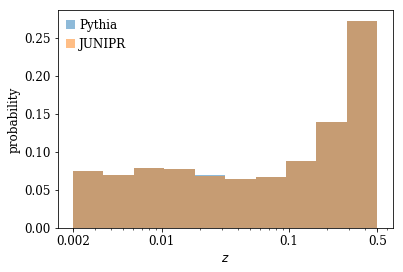

In [13]:
t = None
plt.bar(*p_z(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
plt.bar(*p_z(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xscale('log')
plt.xlabel('$z$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0.002, 0.01, 0.1, 0.5], [0.002, 0.01, 0.1, 0.5])
plt.legend()
plt.show()

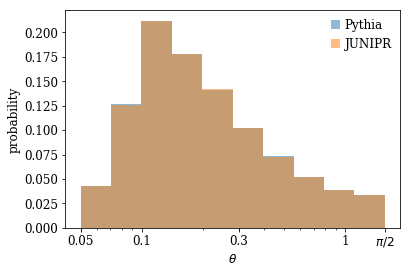

In [14]:
t = None
plt.bar(*p_theta(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
plt.bar(*p_theta(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xscale('log')
plt.xlabel('$\\theta$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0.05, 0.1, 0.3, 1, np.pi/2], [0.05, 0.1, 0.3, 1, '$\pi/2$'])
plt.legend()
plt.show()

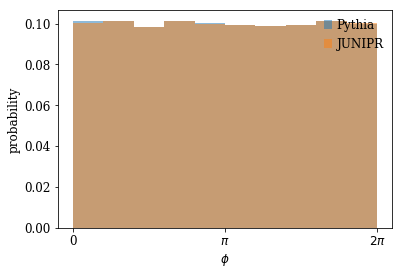

In [15]:
t = None
plt.bar(*p_phi(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
plt.bar(*p_phi(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xlabel('$\\phi$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0, np.pi, 2* np.pi], [0,'$\pi$', '$2\pi$'])
plt.legend()
plt.show()

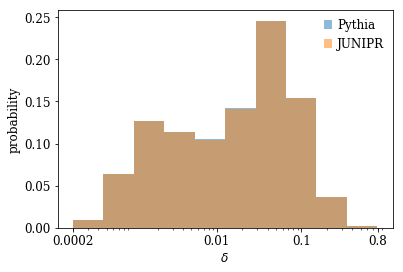

In [16]:
t = None
plt.bar(*p_delta(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
plt.bar(*p_delta(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xscale('log')
plt.xlabel('$\\delta$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([2e-4, 0.01, 0.1, 0.8], [2e-4, 0.01, 0.1, 0.8])
plt.legend()
plt.show()

# Probabilities

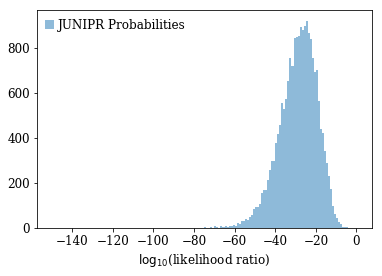

In [17]:
bins = np.linspace(-150,0,151)
plt.hist(np.log10(JUNIPR_probabilities), bins=bins, label = "JUNIPR Probabilities", alpha = 0.5)
plt.xlabel(r'$\log_{10}$(likelihood ratio)')
plt.legend()
plt.show()